# Lab session 5: Logistic regression
__Name: Anthra Devarajan<br>
Registration number: 19BCE1681<br>
Course code: CSE4020<br>
Faculty: Dr. Abdul Quadir<br>
Slot: L31 + L32<br>
Date: 6-September-2021 Monday__

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics

## Read the dataset

#### About the data 

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression

Reference: https://www.kaggle.com/naveengowda16/logistic-regression-heart-disease-prediction

In [2]:
data = pd.read_csv("framingham_heart_disease.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Visualisation - Pairplot

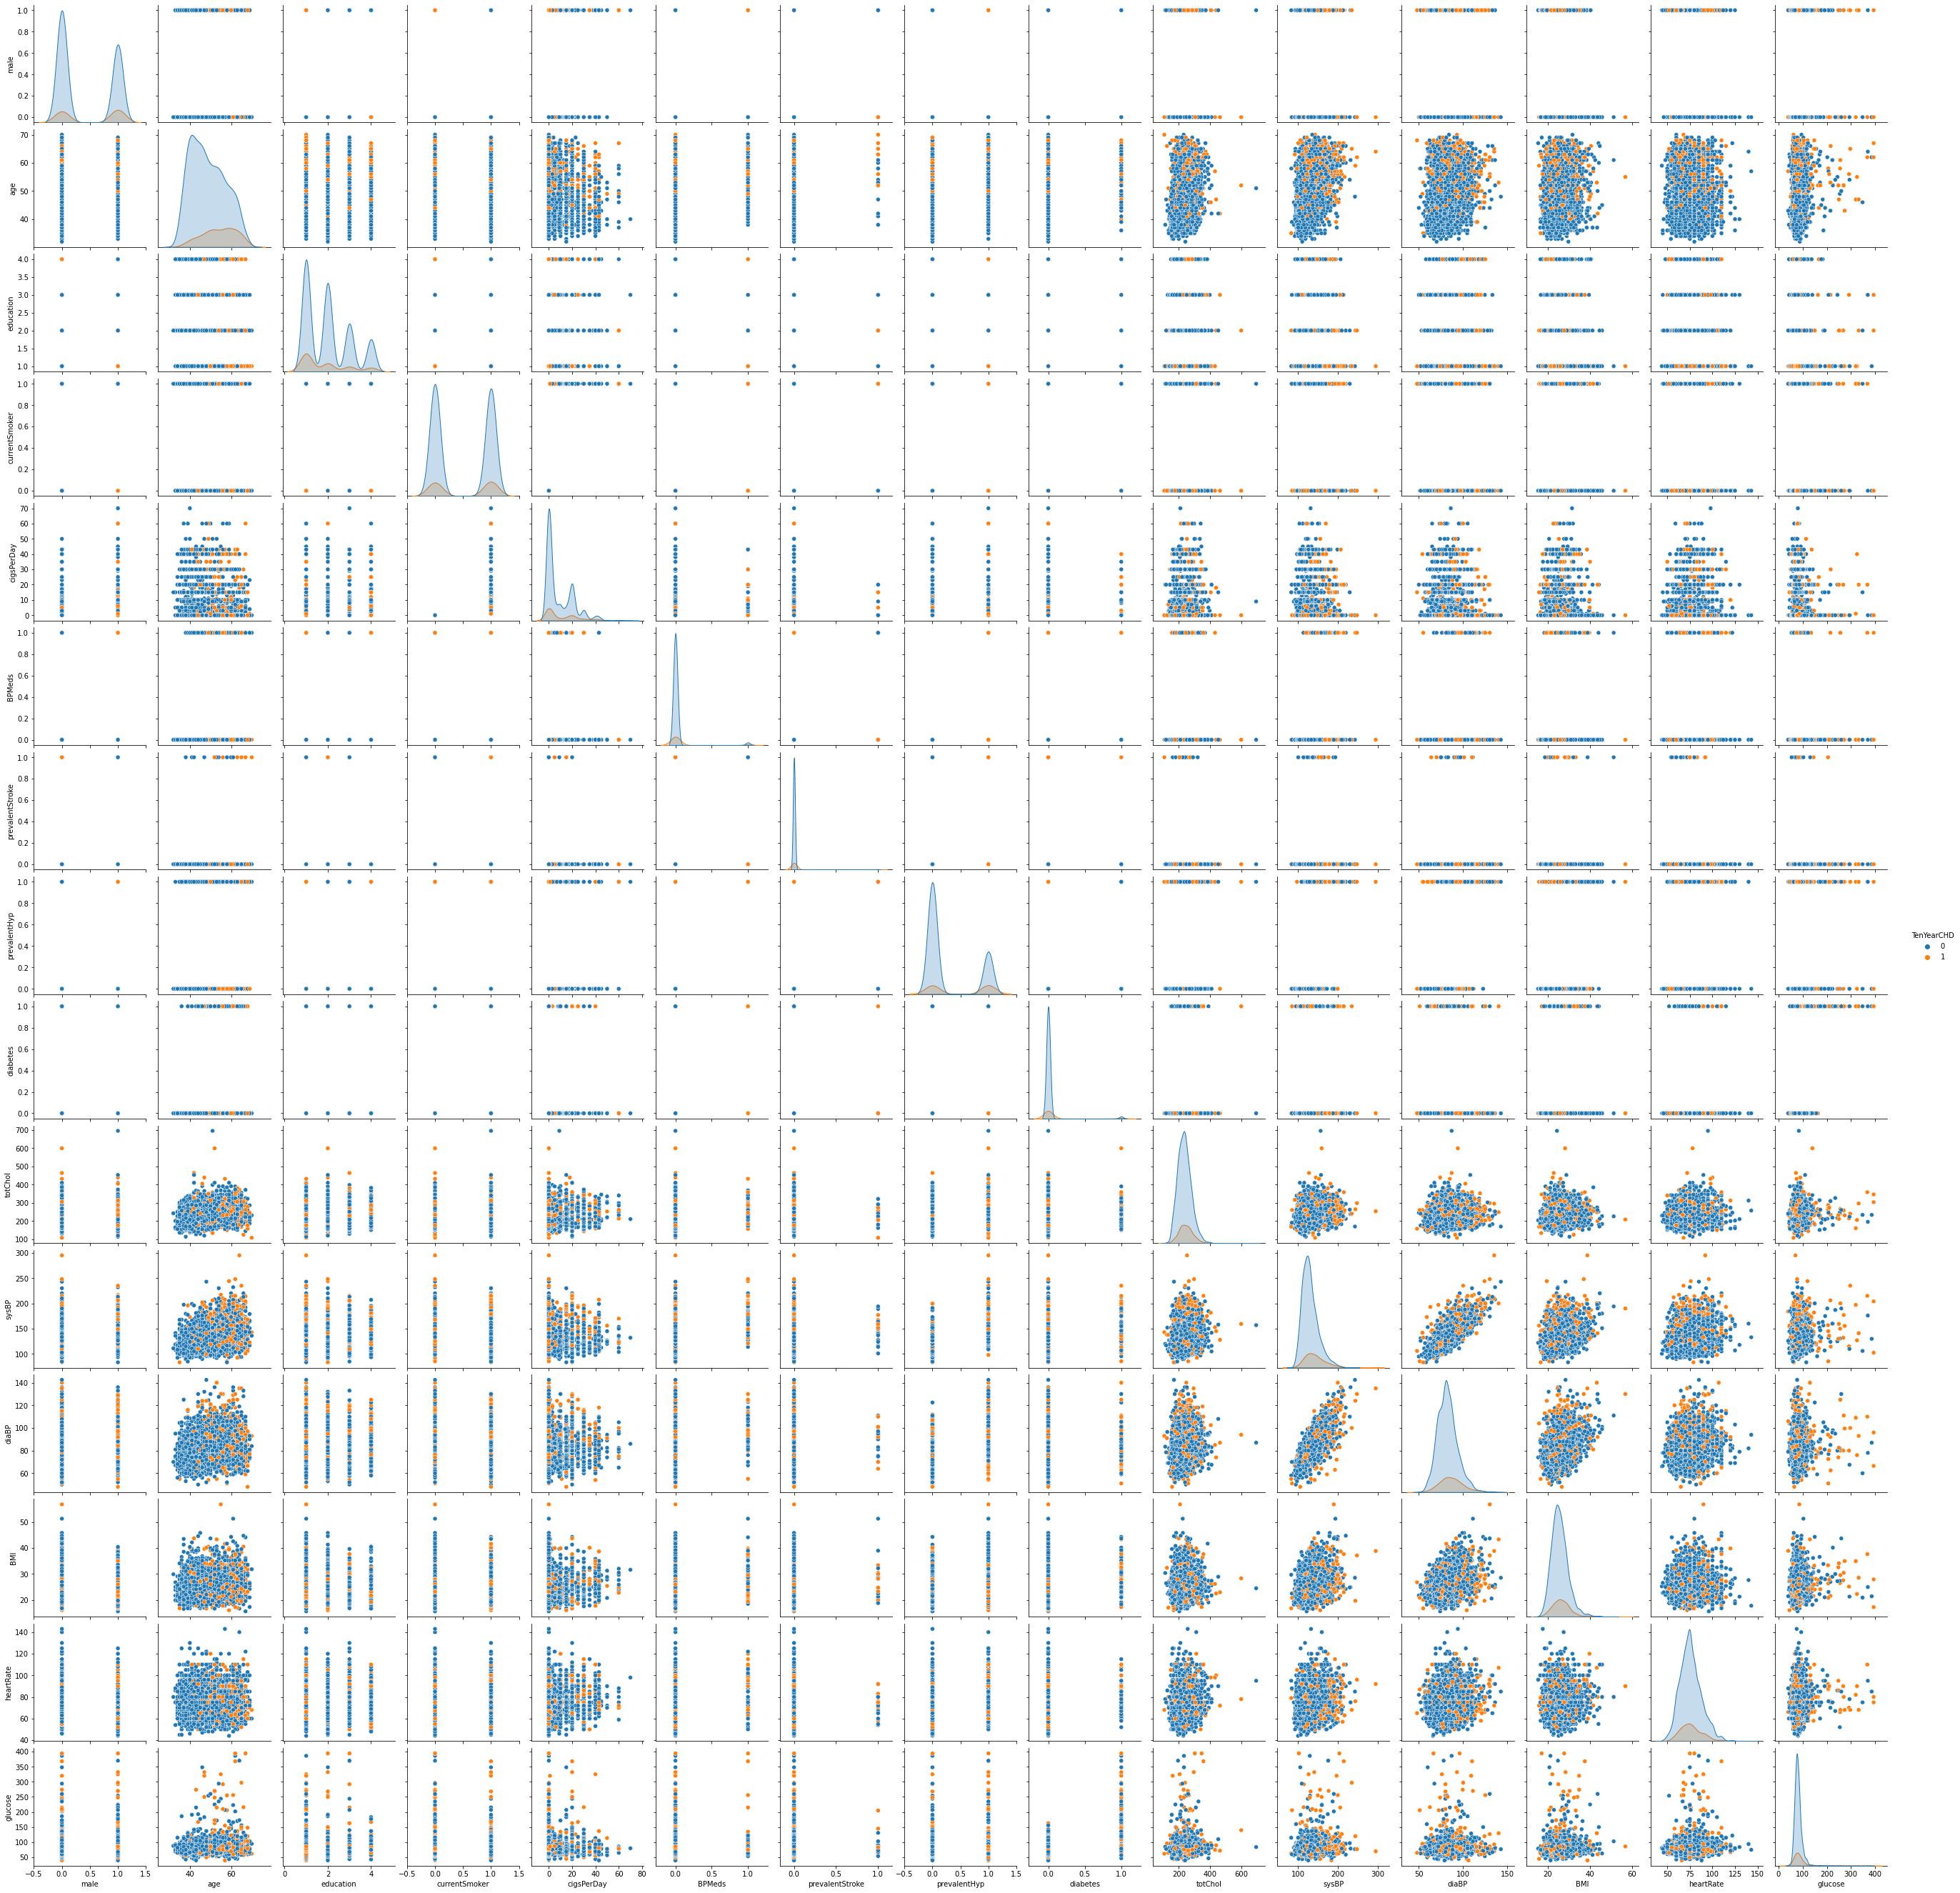

In [3]:
sb.pairplot(data,hue="TenYearCHD")

## Visualisation - Heatplot

<AxesSubplot:>

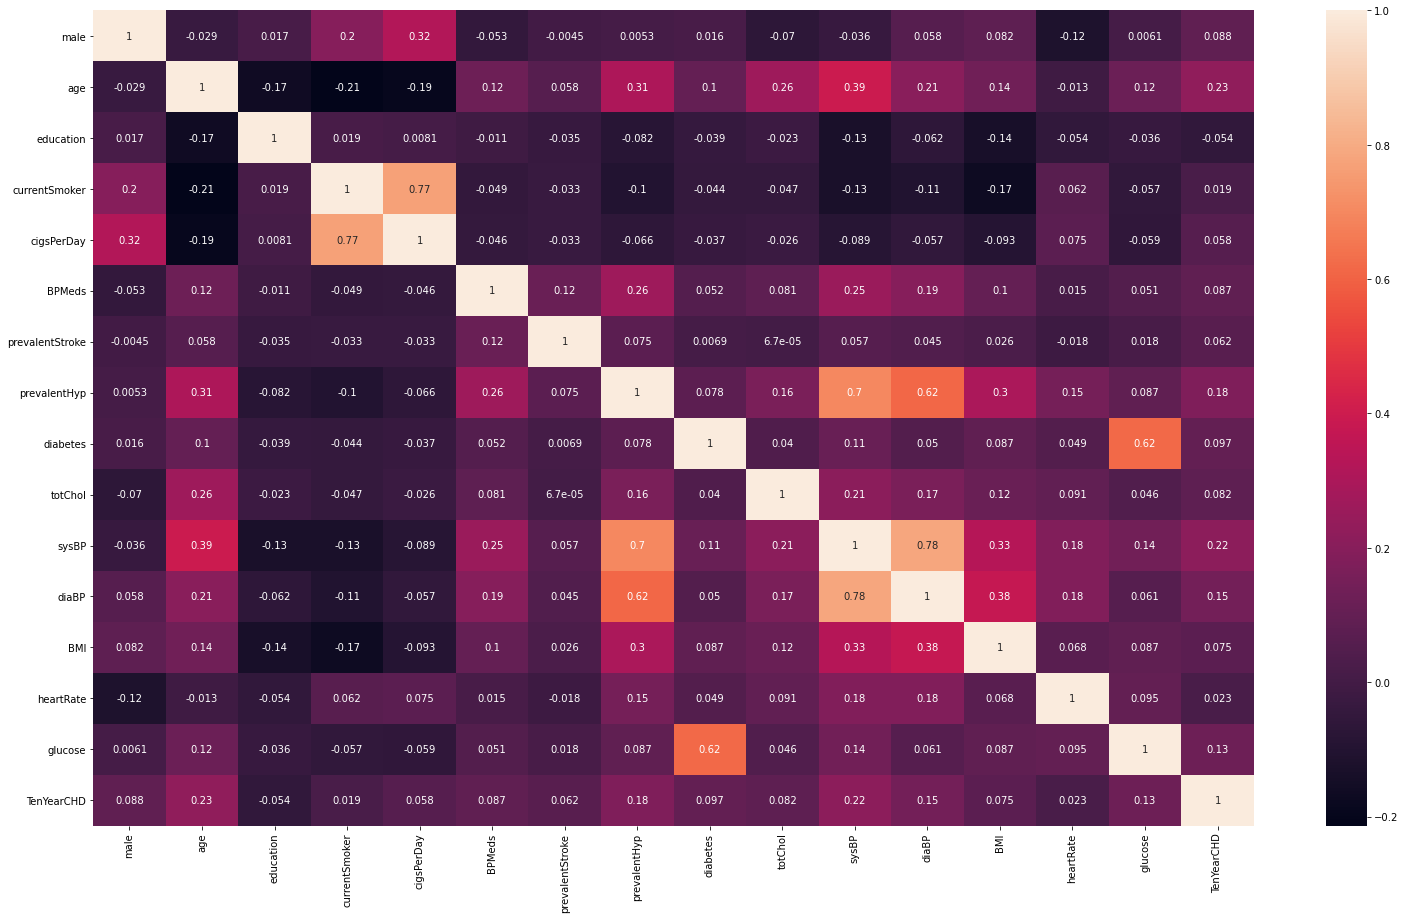

In [4]:
corr=data.corr()
plt.figure(figsize = (26,15))
sb.heatmap(corr, annot=True)

## Missing values

In [5]:
data.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


There are missing values in the dataset, hence not clean. They need to be filled as shown below

In [6]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
data['cigsPerDay'].fillna(data['cigsPerDay'].mean(), inplace=True)
data['BPMeds'].fillna(data['BPMeds'].mean(), inplace=True)
data['totChol'].fillna(data['totChol'].mean(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)
data['glucose'].fillna(data['glucose'].mean(), inplace=True)
data['heartRate'].fillna(data['heartRate'].mean(), inplace=True)

In [8]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

The missing values in the columns are filled by the mean of that respective column
However, the *education* column is not filled because based on evaluation of the heatplot, I have decided that the column has very low or negligible correlation with the other attributes and therefore, will not play a significant role in determining the label feature.

In [9]:
data = data.drop('education', 1)

<ipython-input-9-e5e5645217fe>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('education', 1)


In [10]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Now, the education column is deleted and the NaN values are filled with the mean values. The dataset is clean for training and modelling

## Split target from the dataset

In [11]:
X = data.drop('TenYearCHD',axis=1)
y = data['TenYearCHD']
print(X)
print(y)

      male  age  currentSmoker  cigsPerDay   BPMeds  prevalentStroke  \
0        1   39              0         0.0  0.00000                0   
1        0   46              0         0.0  0.00000                0   
2        1   48              1        20.0  0.00000                0   
3        0   61              1        30.0  0.00000                0   
4        0   46              1        23.0  0.00000                0   
...    ...  ...            ...         ...      ...              ...   
4233     1   50              1         1.0  0.00000                0   
4234     1   51              1        43.0  0.00000                0   
4235     0   48              1        20.0  0.02963                0   
4236     0   44              1        15.0  0.00000                0   
4237     0   52              0         0.0  0.00000                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97    

## Split train test data

In [12]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=42)
print("Train size:",len(train_x))
print("Test size:",len(test_x))

Train size: 2966
Test size: 1272


## MinMax Scaler applied

In [13]:
minmax = preprocessing.MinMaxScaler()
train_y1, test_y1 = minmax.fit_transform(train_y.values.reshape(-1,1)),minmax.fit_transform(test_y.values.reshape(-1,1))
train_y1 = train_y1.flatten()
test_y1 = test_y1.flatten()

In [14]:
print(train_y1)

[0. 0. 0. ... 0. 0. 0.]


In [15]:
print(train_x.shape)
print(train_y1.shape)
print(test_x.shape)
print(test_y1.shape)

(2966, 14)
(2966,)
(1272, 14)
(1272,)


## Train Regression Model

In [18]:
clf = linear_model.LogisticRegression()
clf.fit(train_x, train_y1)

/Users/srinivasanperumal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions

#### On test data

In [19]:
pred=clf.predict(test_x)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
test_y

3188    0
764     0
3264    0
1967    0
2185    0
       ..
610     1
570     0
343     1
2159    0
2357    0
Name: TenYearCHD, Length: 1272, dtype: int64

In [21]:
# Accuracy
metrics.accuracy_score(test_y1, pred)

0.8553459119496856

In [22]:
# Precision
precision = metrics.precision_score(test_y1, pred)
precision

0.5909090909090909

In [23]:
# Recall
recall = metrics.recall_score(test_y1, pred)
recall

0.06914893617021277

In [24]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(test_y1, pred)
cnf_matrix

array([[1075,    9],
       [ 175,   13]])

In [25]:
# F1
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.12380952380952381

#### On the entire dataset

In [28]:
X2=data.values[:,0:14]
X2

array([[  1.        ,  39.        ,   0.        , ...,  26.97      ,
         80.        ,  77.        ],
       [  0.        ,  46.        ,   0.        , ...,  28.73      ,
         95.        ,  76.        ],
       [  1.        ,  48.        ,   1.        , ...,  25.34      ,
         75.        ,  70.        ],
       ...,
       [  0.        ,  48.        ,   1.        , ...,  22.        ,
         84.        ,  86.        ],
       [  0.        ,  44.        ,   1.        , ...,  19.16      ,
         86.        ,  81.96675325],
       [  0.        ,  52.        ,   0.        , ...,  21.47      ,
         80.        , 107.        ]])

In [37]:
pred_total = clf.predict(X2)
data['Predicted_TenYearCHD'] = pred_total

## Evaluation of the model

__Accuracy__


In [38]:
metrics.accuracy_score(data['TenYearCHD'],data['Predicted_TenYearCHD'])

0.8506370929683813

__Precision__

In [39]:
precision = metrics.accuracy_score(data['TenYearCHD'],data['Predicted_TenYearCHD'])
precision

0.8506370929683813

__Recall__

In [40]:
recall = metrics.recall_score(data['TenYearCHD'],data['Predicted_TenYearCHD'])
recall

0.05124223602484472

__Confusion Matrix__

In [41]:
metrics.confusion_matrix(data['TenYearCHD'],data['Predicted_TenYearCHD'])

array([[3572,   22],
       [ 611,   33]])

__F1 score__

In [43]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.0966615938254883

## Practice using the Admission_Predict.csv file

In [3]:
df = pd.read_csv("Admission_Predict.csv")
print(df.shape)
print(df.info())
print(df.head())

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB
None
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.

In [4]:
# how many has got admissions out of 400
print(df[df['Chance of Admit']=='yes'].count())

Serial No.           367
GRE Score            367
TOEFL Score          367
University Rating    367
SOP                  367
LOR                  367
CGPA                 367
Research             367
Chance of Admit      367
dtype: int64


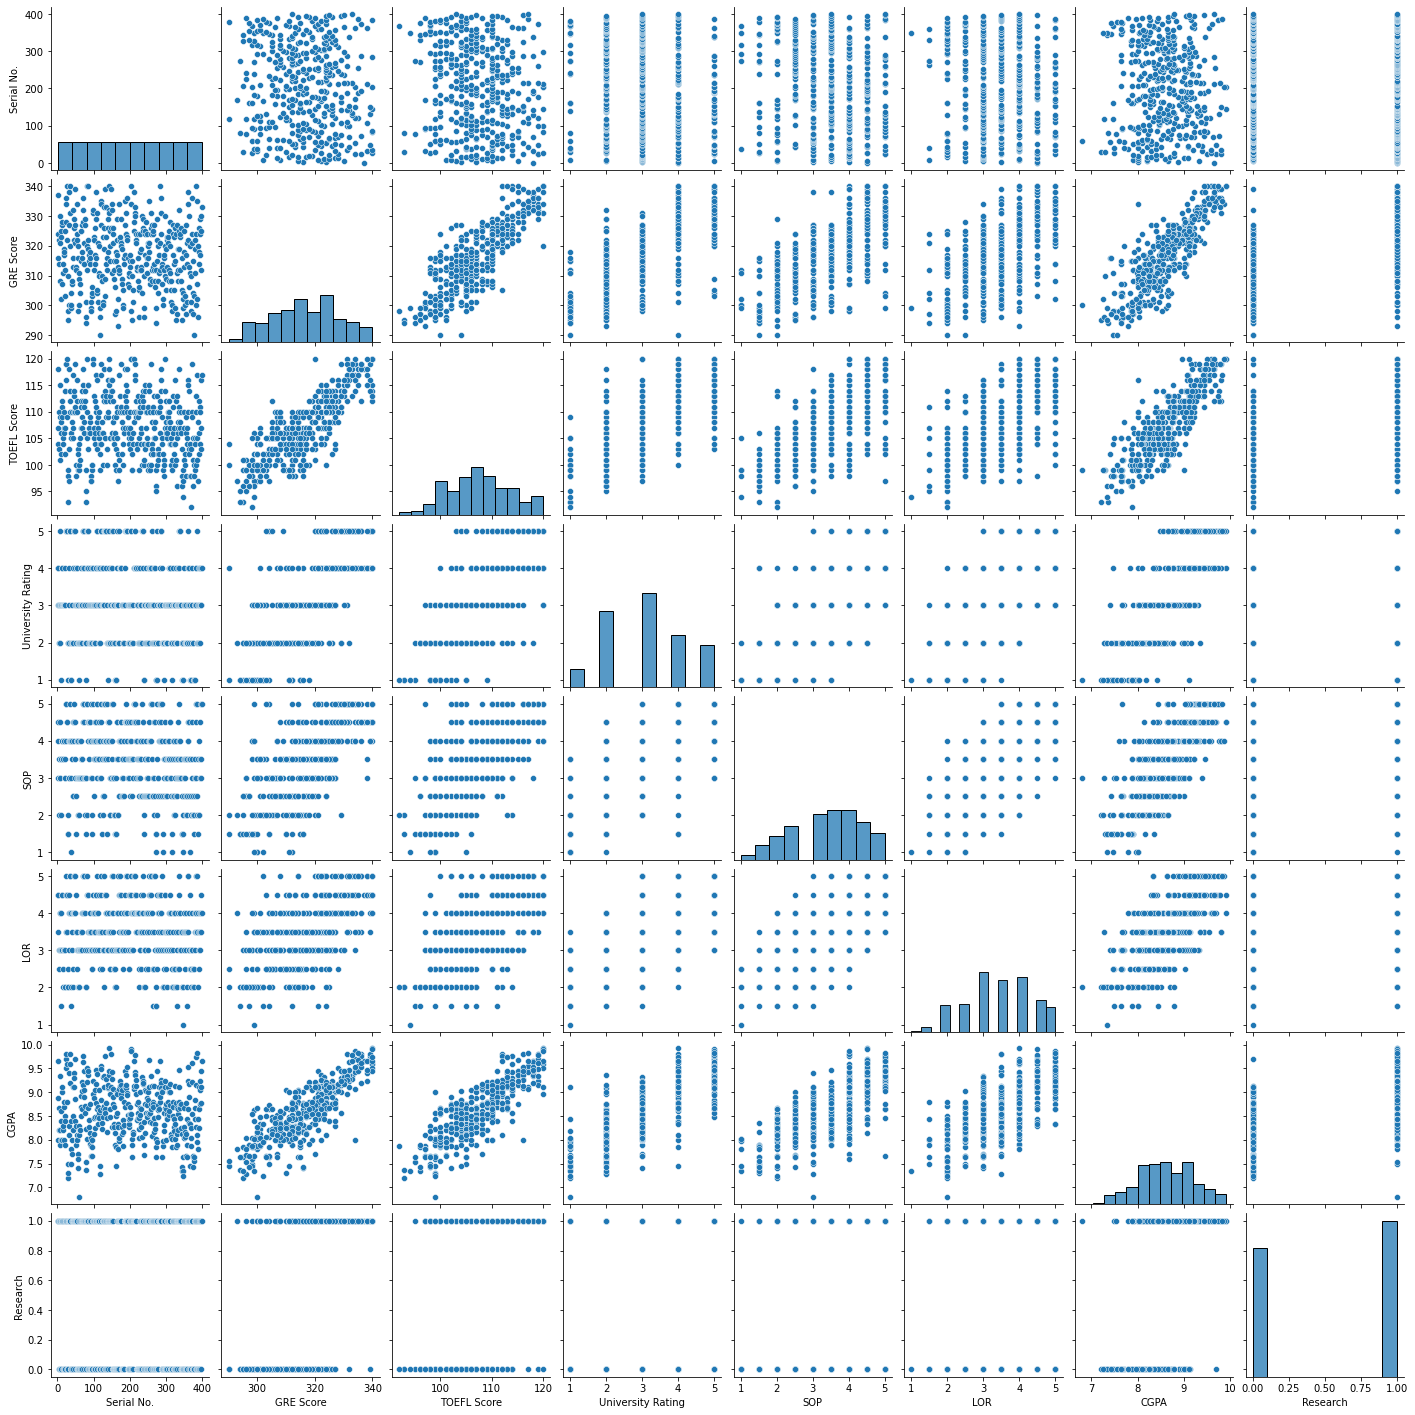

In [5]:
# Lot of linearity exists between the columns so LR is suited
sb.pairplot(df)
plt.show()

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   

                        SOP      LOR       CGPA  Research  
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138  
GRE Score          0.612831  0.557555  0.833060  0.580391  
TOEFL Score        0.657981  0.567721  0.828417  0.489858  
University Rating  0.734523  0.660123  0.746479  0.447783  
SOP            

<AxesSubplot:>

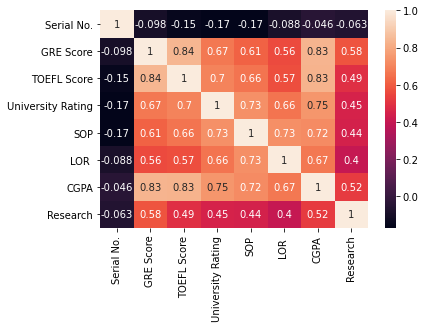

In [6]:
df1  = df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [7]:
# Removing the serial no and retaining it
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,yes
1,324,107,4,4.0,4.5,8.87,1,yes
2,316,104,3,3.0,3.5,8.00,1,yes
3,322,110,3,3.5,2.5,8.67,1,yes
4,314,103,2,2.0,3.0,8.21,0,yes


In [8]:
# checking the missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2 = df.values
train_x = (df2[:,0:7])
train_y = df2[:,7]
print(train_x)
print(train_y)

[[337 118 4 ... 4.5 9.65 1]
 [324 107 4 ... 4.5 8.87 1]
 [316 104 3 ... 3.5 8.0 1]
 ...
 [330 116 4 ... 4.5 9.45 1]
 [312 103 3 ... 4.0 8.78 0]
 [333 117 4 ... 4.0 9.66 1]]
['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'y

In [10]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.94       0.92857143 0.75       ... 0.875      0.91346154 1.        ]
 [0.68       0.53571429 0.75       ... 0.875      0.66346154 1.        ]
 [0.52       0.42857143 0.5        ... 0.625      0.38461538 1.        ]
 ...
 [0.8        0.85714286 0.75       ... 0.875      0.84935897 1.        ]
 [0.44       0.39285714 0.5        ... 0.75       0.63461538 0.        ]
 [0.86       0.89285714 0.75       ... 0.75       0.91666667 1.        ]]


In [11]:
regress.fit (train_x,train_y)
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[ 1.84653573  1.95483918  0.24428078 -0.02699547  1.5526433   2.61487109
   0.44589894]]
Intercept:  [-1.47821059]


In [12]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv("log_result_1.csv")

yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes